##1. Mount your google drive repo if you are using Google Colab:

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
DATA_DIR = '/content/drive/MyDrive/Omdena Algeria/drive-download-20231015T124514Z-001.zip (Unzipped Files)/'
TRAIN_DIR = DATA_DIR + 'training'
TEST_DIR = DATA_DIR + 'test'

The dimensions of the image is 400x368


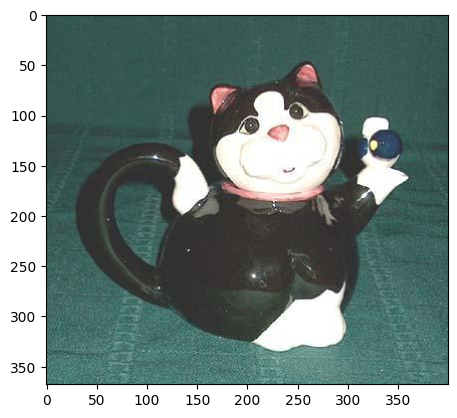

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('/content/drive/MyDrive/Omdena Algeria/drive-download-20231015T124514Z-001.zip (Unzipped Files)/training/teapot/212_0011.jpg')
plt.imshow(img)
width, height = img.size
print("The dimensions of the image is "+str(width)+"x"+str(height))


##2. Import necessary libraries:

In [10]:
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as T
import torch

stat_ds = ImageFolder(TRAIN_DIR,T.Compose([T.ToTensor()]))
stat_dl = DataLoader(stat_ds)
nimages = 0
mean = 0.
std = 0.
for batch, _ in stat_dl:
    # Rearrange batch to be the shape of [B, C, W * H]
    batch = batch.view(batch.size(0), batch.size(1), -1)
    # Update total number of images
    nimages += batch.size(0)
    # Compute mean and std here
    mean += batch.mean(2).sum(0)
    std += batch.std(2).sum(0)

# Final step
mean /= nimages
std /= nimages

print(mean,std)
# tensor([0.5553, 0.5328, 0.4966]) tensor([0.2183, 0.2254, 0.2327])

tensor([0.5728, 0.5542, 0.5207]) tensor([0.2270, 0.2340, 0.2455])


In [29]:
image_size = 224 # vgg16 input size
batch_size = 64
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = 5
# stats = (0.5553, 0.5328, 0.4966), (0.2183, 0.2254, 0.2327)

In [11]:
train_tfms = T.Compose([T.Resize(image_size),
                         T.RandomHorizontalFlip(),
                         T.RandomAffine(degrees= (0,10), translate=(0,0.07), scale=(1,1.1), fill =0),
                         T.RandomCrop((140,140), padding=None, pad_if_needed=False, fill=0, padding_mode='reflect'),
                         T.RandomApply(torch.nn.ModuleList([T.ColorJitter(),]),p=0.1),
                         T.ToTensor(),
                         #  T.Normalize(*stats,inplace=True)
                         ])
val_tfms = T.Compose([T.Resize(image_size),
                         T.CenterCrop(image_size),
                         T.ToTensor(),
                         #  T.Normalize(*stats,inplace=True)
                         ])
pred_tfms = T.Compose([
                         T.ToTensor()
                         ])

In [12]:
train_ds = ImageFolder(TRAIN_DIR,train_tfms)
len(train_ds)

489

Label: waterfall
torch.Size([3, 140, 140])


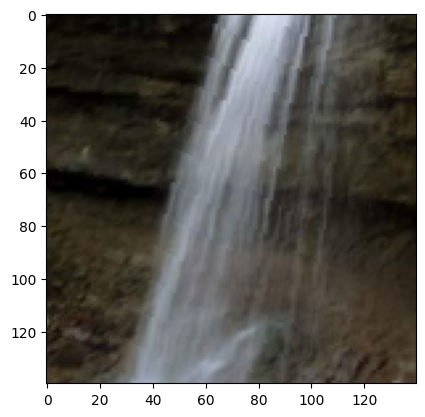

In [18]:
image, label = train_ds[452]
plt.imshow(image.permute(1, 2, 0))
print('Label:', train_ds.classes[label])
print(image.shape)

## 3. Load vgg16 model from keras library without top classification layers:

In [31]:
import torchvision.models as models
import torch.nn as nn

model = models.vgg16(pretrained=False)
model.classifier[-1] = nn.Linear(in_features=4096, out_features=num_classes)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

##4. Add classification layers:
####You should respect the number of necessary neurons, and the required activation function for multiclass classification in the last layer.

##5. Display the model's architecture:

##6. Freeze the early layers and train only the last layers :


*  Freezing means keeping the weights of some layers since they have been already trained on a similar task.
*   You can choose to train only the added layers (transfer learning), or train some of the base model layers for a better accuracy, in addition to the new layers (finetuning).

## 7. Compile the model:

##8. Train the model on train folder for 10 iterations (epochs):


---



##9. Save the model:
Saving the model allows you to load it later for future use.

##10. Load an image sample from your test folder to classify it, and display the classification result:

### Dataset links:

[Full dataset](https://drive.google.com/drive/folders/1dx4Kj8u-dBcIHpWfk_KColg-5NKjCg16?usp=sharing)

**Important:** You have to copy the shared dataset folders to your drive folder before starting the experiment.